In [69]:
# https://en.wikipedia.org/wiki/Dirichlet_process
def stick_breaking(n, alpha):
    n_blocks = []
    prev_n = n
    i = 1
    while prev_n > 1:
#    for i in range(n*2):
        beta = np.random.beta( 1, alpha )
        current_stick = int( prev_n * beta )
        # print('%5.2f - %2d - %2d' % ( beta, current_stick, prev_n ) )
        prev_n = prev_n - current_stick
        if ( current_stick > 0 ):
            n_blocks.append(current_stick)
    if ( prev_n == 1):
        n_blocks[-1] = n_blocks[-1] + 1
    return n_blocks

In [285]:
# https://en.wikipedia.org/wiki/Normal-inverse-Wishart_distribution
def generate_models_NIW( n ):
    import matplotlib.pyplot as plt
    from scipy.stats import invwishart

    covs = []
    means = []

    # Normal-inverse-Wishart parameters
    df = 6
    scale = [[2,0.5],[0.5,2]]
    la = 0.2

    # Generation of covariance matrix from Normal-inverse-Wishart distribution
    for i in range( num_clusters ):
        # covariance matrix is sampled from Inverse-Wishart
        cov_temp = invwishart.rvs(df, scale)
        # mean is sampled from Normal distribution with the sample covariance
        mean_temp = np.random.multivariate_normal( [0,0], cov_temp/la)
    
        covs.append(list(cov_temp))
        means.append(list(mean_temp))
    
    return (means, covs)


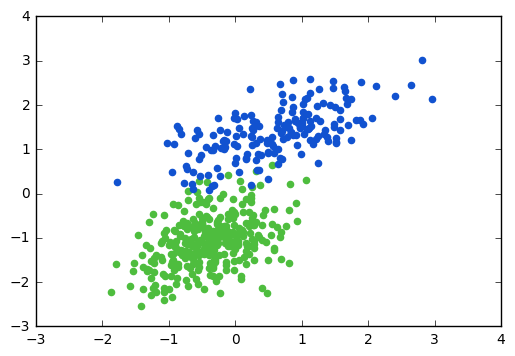

In [302]:
# EM algorithms
# - This program generate the number of clusters and 
#    parameters for normal distributions
#


import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt

# n: the number of samples
n = 500; 
#print (random.sample(range(n), n))

# Generate cluster sizes by the stick breaking procedure
cluster_sizes = stick_breaking(n, 0.6)
num_clusters = len( cluster_sizes )

# Generate parameters (mean and covariance) for each cluster
(means, covs) = generate_models_NIW( num_clusters )

samples = np.array([])

plt.figure(1)

for i in range( num_clusters ):
    samples_temp = np.random.multivariate_normal( means[i], covs[i], cluster_sizes[i] )
    plt.scatter( samples_temp[:,0], samples_temp[:,1], color = np.random.rand(3,1))
    if len(samples) == 0:
        samples = samples_temp
    else:
        samples = np.vstack( (samples, samples_temp))
plt.show()


Iteration 1


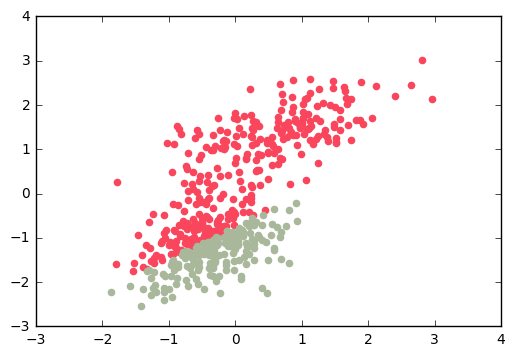

Iteration 2


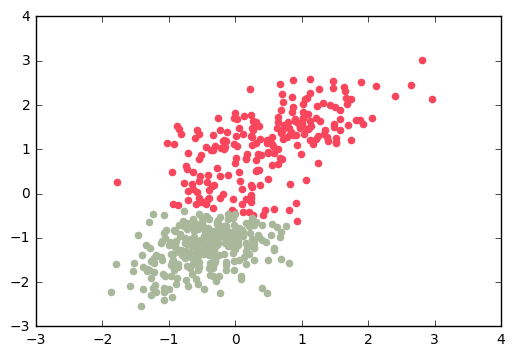

Iteration 3


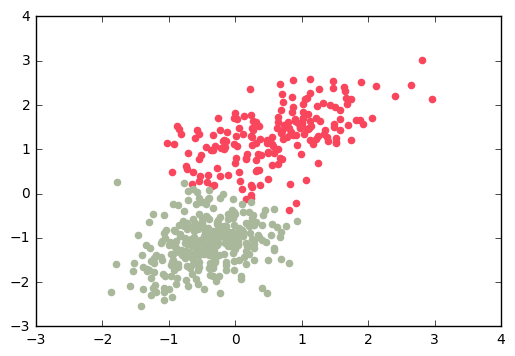

Iteration 4


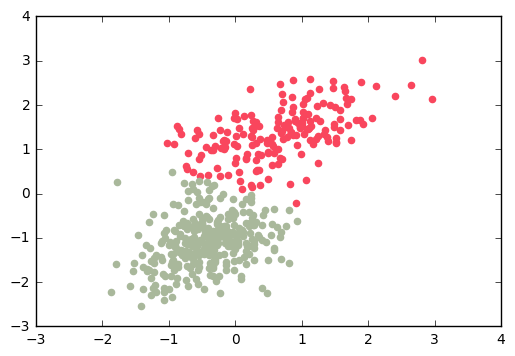

Iteration 5


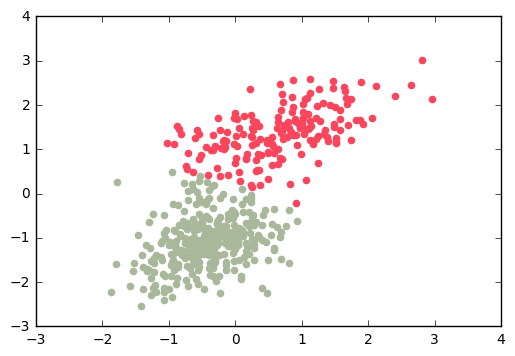

In [307]:
# Start of EM algorithm

#####################################################
## PLEASE WRITE YOUR NAME AND ID HERE
## NAME: 
## ID:
## Description: [PLEASE PROVIDE A SHORT DESCRIPTION YOUR SOLUTION]
#####################################################

# number of clusters
k = 2
k_centers = np
color = [None] *k 

for i in range(k):
    color[i] = np.random.rand(3,1)

# Initialize Seeds
k_centers = np.empty([k,2])
n_members = np.empty([n])

random_seeds = random.sample(range(1,n), k)
k_centers = samples[random_seeds,:]

dist = np.empty([n,k])

plt.figure(2)
for iter in range(5):

    # Expectation Steps - Find the distance between k centers and each samples 
    # Input: samples, k and k_centers 
    # Output: n_members whose size is n. n_members[i] will have the cluster number of minimum distance 
    #         from ith sample (samples[i,:]). The cluster center location is stored at k_center[i,:]
    
    # TODO 1: PLEASE PROVIDE YOUR SOLUTION (E-Step) HERE
    
    
    # Maximization Steps - Find the new centers of each clusters
    # Input: samples, k and n_members
    # Output: k_centers - average of samples in each cluster
    
    # TODO 2: PLEASE PROVIDE YOUR SOLUTION (M-Step) HERE
    
    # Visualize the clusters   
    print('Iteration %d' % (iter + 1) )
    plt.subplot()
    for i in range(k):
        indx = np.where( n_members == i )
        plt.scatter( samples[indx, 0], samples[indx, 1], color= color[i])

    plt.show()

In [271]:
print(color[1])

[[ 0.67458083]
 [ 0.87494986]
 [ 0.68371924]]


In [37]:
print( iw )

[[ 0.74097165  0.64585294]
 [ 0.64585294  0.75325055]]
